In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

In [2]:
# attempt to enable LaTeX rendering
# change to `False` if you get an error during plotting (latex not installed)
plt.rcParams['text.usetex'] = True

# Geometry

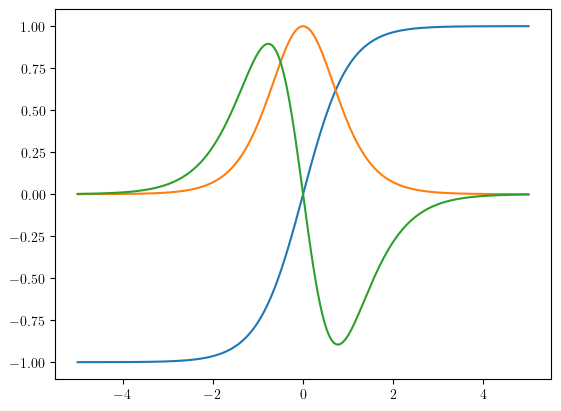

In [3]:
x = np.linspace(-5, 5, 200)
y = np.tanh(x)
dy = 1 / np.cosh(x) ** 2
dy2 = -2 * dy * x
plt.plot(x, y)
plt.plot(x, dy)
plt.plot(x, dy2)
plt.show()

# Entropy and MI

Data are computed by Mathematica:

```
(* Define the inverse hyperbolic tangent function *)
InverseTanh[y_] := 1/2 Log[(1 + y)/(1 - y)]

(* Define the Gaussian PDF for X ~ N(a, 1) *)
pX[x_, a_] := 1/Sqrt[2 Pi] Exp[-(x - a)^2/2]

(* Define the Jacobian of the inverse hyperbolic tangent *)
J[y_] := 1/(1 - y^2)

(* Combine these to define p_Y(y) *)
pY[y_, a_] := pX[InverseTanh[y], a] * J[y]

(* Define the entropy H(Y) *)
HY[a_, t_] := -NIntegrate[pY[y, a] Log[pY[y, a]], {y, -1 + t, 1 - t}]

(* Generate values for a in linspace(-5, 5, 201) *)
aValues = Table[a, {a, -5, 5, 10/200}];
entropyValues = Table[HY[a, 0.05], {a, aValues}];

(* Combine aValues and entropyValues into a single list *)
data = Transpose[{aValues, entropyValues}];

(* Save the data to a plain text file *)
Export["entropyValues.txt", data, "Table"]
```

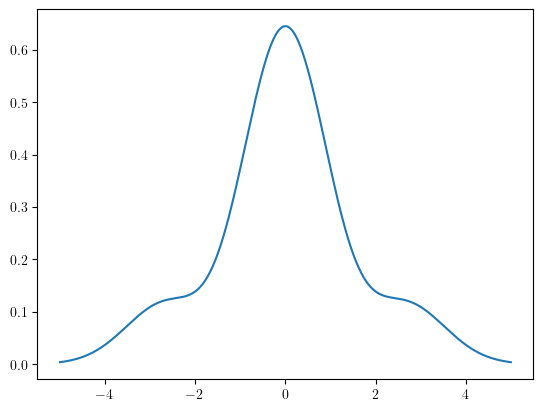

In [4]:
with open("datasets/mi_tanh", "r") as file:
    data_str = file.read()
data_str = data_str.replace("{", "[").replace("}", "]")
data_list = eval(data_str)
mi = np.array(data_list)
plt.plot(mi[:, 0], mi[:, 1])

# Fourier analysis

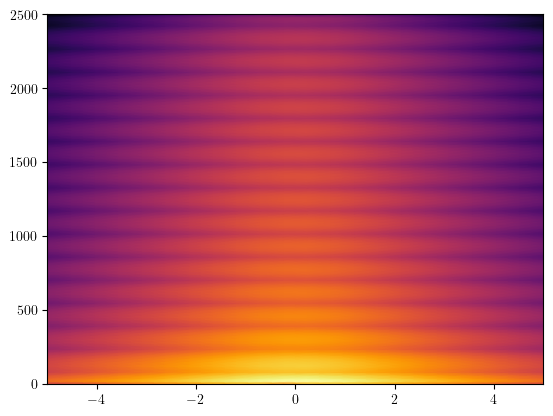

In [5]:
x_values = np.linspace(-5, 5, 5000)
y_values = np.tanh(x_values)
frequencies, times, Sxx = spectrogram(y_values, fs=5000)
adjusted_times = np.linspace(-5, 5, len(times))
plt.pcolormesh(adjusted_times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='inferno')
plt.show()

# Nice plot

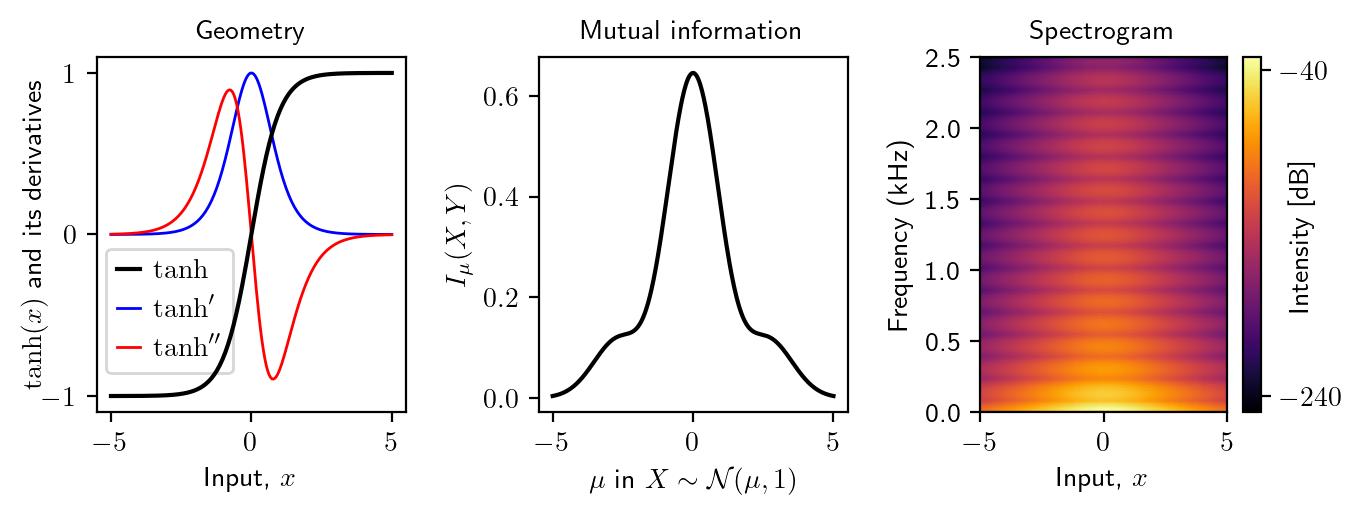

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(10 / 1.3, 3 / 1.3), dpi=200)
plt.subplots_adjust(wspace=.43)
ax[0].plot(x, y, c="k", lw=1.5, label="$\\tanh$", zorder=100)
ax[0].plot(x, dy, c="b", lw=1., label="$\\tanh'$")
ax[0].plot(x, dy2, c="r", lw=1., label="$\\tanh''$")
ax[0].set_xlabel("Input, $x$")
ax[0].set_yticks([-1, 0, 1])
ax[0].set_ylabel("$\\tanh(x)$ and its derivatives", labelpad=-2)
ax[0].legend(handlelength=.8, handletextpad=.5, loc=(0.03, 0.11))
text_y = 1.05
ax[0].text(0.5, text_y, "Geometry", transform=ax[0].transAxes, ha="center")

ax[1].plot(mi[:, 0], mi[:, 1], c='k', lw=1.5)
ax[1].set_xlabel("$\\mu$ in $X\\sim\\mathcal{N}(\\mu, 1)$")
ax[1].set_ylabel("$I_\\mu(X, Y)$")
ax[1].text(0.5, text_y, "Mutual information", transform=ax[1].transAxes, ha="center")

db = 10 * np.log10(Sxx)
cax = ax[2].pcolormesh(adjusted_times, frequencies, db,
                       shading='gouraud', cmap='inferno')
ax[2].set_yticks([0, 500, 1000, 1500, 2000, 2500], [0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
ax[2].set_ylabel('Frequency (kHz)')
ax[2].set_xlabel('Input, $x$')
ax[2].text(0.5, text_y, "Spectrogram", transform=ax[2].transAxes, ha="center")
cbar = fig.colorbar(cax, ax=ax[2], ticks=[-240, -40])
cbar.set_label('Intensity [dB]', labelpad=-20)
plt.savefig("figs/tanh.pdf", pad_inches=0.01, bbox_inches="tight")
plt.show()